## Mini Project III

TASK 1
create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
    - based on demographics (only on the information from twm_customer)

In [35]:
#import Libraries
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
from sklearn.datasets import make_blobs
import csv
from sklearn.decomposition import PCA


In [36]:
file_name = r"C:\Users\zarah\Desktop\Lighthouse Labs\Week5\mini-project-III\mini-project-III\Datafiles\twm_customer.csv"
df_customer = pd.read_csv(file_name, sep=";")
df_customer

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [37]:
df_customer.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


Text(0, 0.5, 'age')

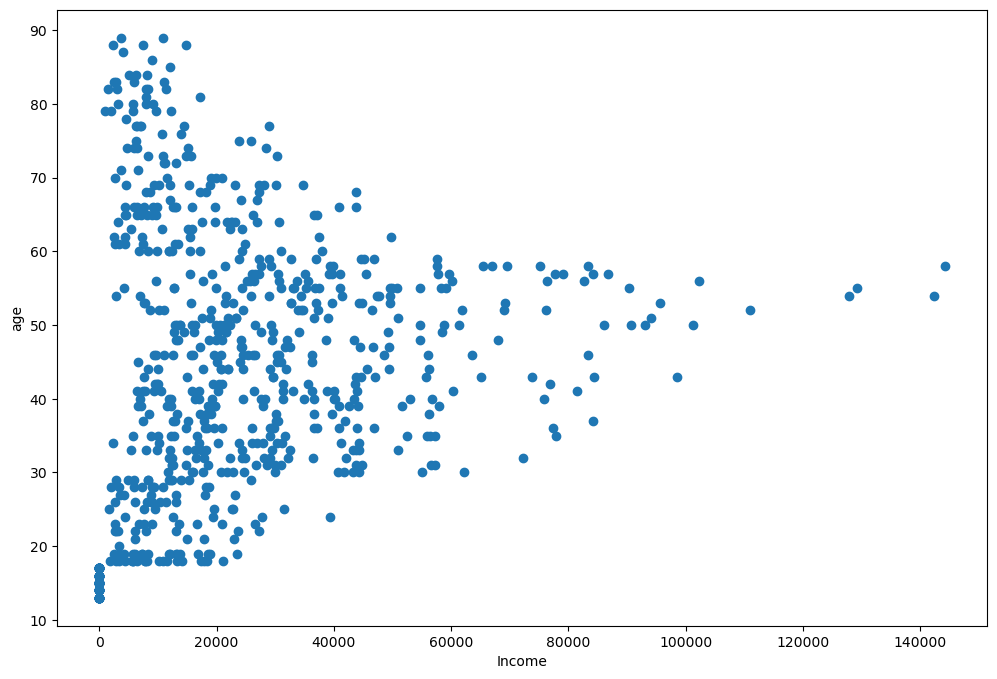

In [38]:
x=df_customer['income']
y=df_customer['age']

plt.scatter(x, y)
plt.xlabel('Income')
plt.ylabel('age')

Data Preperation
    
    Finding Null Values in Dataset

In [39]:
# checking for missing values
# df_customer.isnull()
df_customer.info()

#Comments: No Null Value present in the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


    Detecting Outliers in Numerical Data with Z-Score

In [40]:
from scipy import stats
import numpy as np

df_z_scores = stats.zscore(df_customer[['age', 'income', 'years_with_bank', 'nbr_children', 'marital_status']])
df_z_scores

,age,income,years_with_bank,nbr_children,marital_status
0,0.184312,0.154185,0.408539,0.258591,0.132149
1,1.493070,-0.726524,-1.087435,-0.648298,0.132149
2,-0.234490,-0.188366,1.530520,-0.648298,-0.989614
3,0.603115,1.123798,-0.339448,-0.648298,-0.989614
4,0.864867,0.983479,1.904514,1.165479,2.375675
...,...,...,...,...,...
742,-0.339191,-0.357478,0.782533,0.258591,2.375675
743,0.707816,0.164864,0.782533,0.258591,0.132149
744,0.393714,1.738064,-1.461429,1.165479,0.132149
745,-0.286841,-0.343735,1.156526,-0.648298,0.132149


In [41]:
print(df_z_scores.mean())
print(df_z_scores.std())

age               -9.393052e-17
income            -6.532035e-17
years_with_bank   -1.159269e-17
nbr_children      -1.284113e-16
marital_status    -1.682426e-16
dtype: float64
age                1.00067
income             1.00067
years_with_bank    1.00067
nbr_children       1.00067
marital_status     1.00067
dtype: float64


In [42]:
np.where(np.abs(df_z_scores) > 3)[0]

array([  8,  64, 108, 123, 153, 158, 225, 246, 270, 331, 339, 409, 419,
       422, 479, 484, 490, 498, 520, 525, 595, 611, 639], dtype=int64)

In [43]:
print(df_z_scores.iloc[[  8,  64, 108, 123, 153, 158, 225, 246, 270, 331, 339, 409, 419,
       422, 479, 484, 490, 498, 520, 525, 595, 611, 639]])



          age    income  years_with_bank  nbr_children  marital_status
8   -0.077439  0.775660        -1.087435      3.886146        2.375675
64   0.812516  5.471647         0.408539     -0.648298        0.132149
108  0.655465  3.042477         0.408539     -0.648298        2.375675
123  0.184312  0.358129         0.034546      3.886146        2.375675
153  0.550765  3.282965        -0.339448      0.258591        0.132149
158  0.027261  1.484733        -0.339448      3.886146        0.132149
225  0.236663  0.442617         1.156526      3.886146        0.132149
246  0.655465  4.797496         0.408539      1.165479        1.253912
270 -0.129790  0.789629        -1.461429      3.886146        1.253912
331  0.184312  1.160342         0.782533      3.886146        0.132149
339  0.393714  3.534944        -1.461429     -0.648298        0.132149
409  0.289013  0.721317         1.156526      3.886146        2.375675
419  0.498414  3.977754        -0.713442     -0.648298       -0.989614
422  0

In [44]:
#identifying outliers have a threshold than 3 from the zscores of the numerical columns 
from scipy import stats
print(df_z_scores['income'][(np.abs(stats.zscore(df_z_scores['income'])) > 3)])
print()
print(df_z_scores['nbr_children'][(np.abs(stats.zscore(df_z_scores['nbr_children'])) > 3)])

64     5.471647
108    3.042477
153    3.282965
246    4.797496
339    3.534944
419    3.977754
422    4.736754
479    3.057978
484    3.417291
490    3.584916
525    3.169187
595    3.217087
639    5.386798
Name: income, dtype: float64

8      3.886146
123    3.886146
158    3.886146
225    3.886146
270    3.886146
331    3.886146
409    3.886146
498    3.886146
520    3.886146
611    3.886146
Name: nbr_children, dtype: float64


print(df_customer.loc[[  8, 123, 158, 225, 270, 331, 409, 498, 520, 611]])

Comment: When we run the above code we can see the values of nbr_children where the z_score mentions them as outliers. Upon checking the values there is no identification that these rows are outliers. So we can ignore the z_scores for nbr_children and keep them in our dataframe

In [45]:
df_customer_1 = df_customer.drop(labels=[64, 108, 153,246, 339, 419,422, 479, 484, 490, 525, 595, 639], axis=0).reset_index(drop=True)
print(df_customer_1.shape)

(734, 15)


Understanding Data for Feature Engineering

In [46]:
print(df_customer_1['age'].min(), df_customer_1['age'].max())
print(df_customer_1['income'].min(), df_customer_1['income'].max())
print(df_customer_1['gender'].unique())
print(df_customer_1['marital_status'].unique())
print(df_customer_1['years_with_bank'].unique())


13 89
0 86744
['M ' 'F ']
[2 1 4 3]
[5 1 8 3 9 6 0 2 4 7]


Feature Engineering can be done in the below mentioned way for the different columns/variables in customer table

1. Age - Binning 
2. Income - Log Transformation
3. Gender - Binary
4. Maritial Status - One Hot Encoding 
5. Years with Bank - Binning

Feature Engineering --> transforming age to age_category with binning

In [47]:
#Define bins
bins = [0,25,50,75,100]

#name for the groups
group_names = ['young', 'middle age', 'senior', 'elderly']

df_customer_1['age_category'] = pd.cut(df_customer_1['age'], bins, labels = group_names)

df_customer_1

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,age_category
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,middle age
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,senior
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,middle age
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,senior
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,middle age
730,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,senior
731,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,middle age
732,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,middle age


In [48]:
df_customer_1['age_bin'] = pd.cut(df_customer_1['age'], bins=[0,25,50,75,100], labels=[1,2,3,4])


In [49]:
df_customer_1

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,age_category,age_bin
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,middle age,2
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,senior,3
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,middle age,2
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,senior,3
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,senior,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,middle age,2
730,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,senior,3
731,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,middle age,2
732,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,middle age,2


Feature Engineering --> Transforming income as log_income

Text(0, 0.5, 'Frequency')

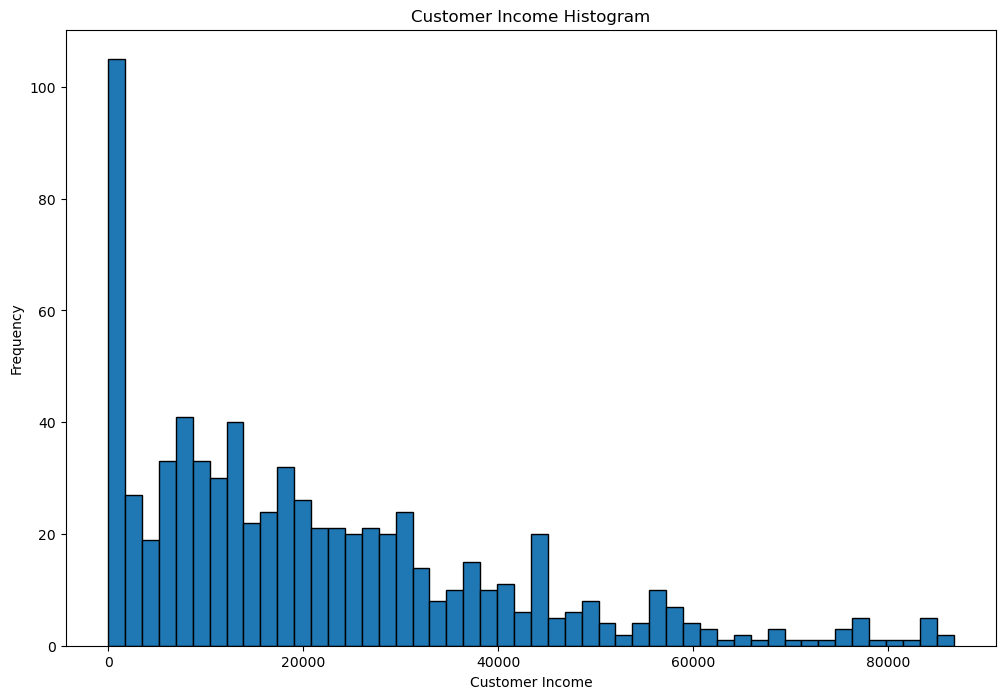

In [50]:
fig, ax = plt.subplots()
df_customer_1['income'].hist(bins=50, edgecolor = 'black', grid = False)
ax.set_title('Customer Income Histogram')
ax.set_xlabel('Customer Income')
ax.set_ylabel('Frequency')

In [51]:
df_customer_1['log_income'] = np.log(1+df_customer_1['income'])
df_customer_1


,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,age_category,age_bin,log_income
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,middle age,2,10.171643
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,senior,3,8.795734
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,middle age,2,9.828171
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,senior,3,10.772037
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,senior,3,10.704480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,middle age,2,9.602112
730,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,senior,3,10.180665
731,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,middle age,2,11.023551
732,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,middle age,2,9.622516


Text(0, 0.5, 'Frequency')

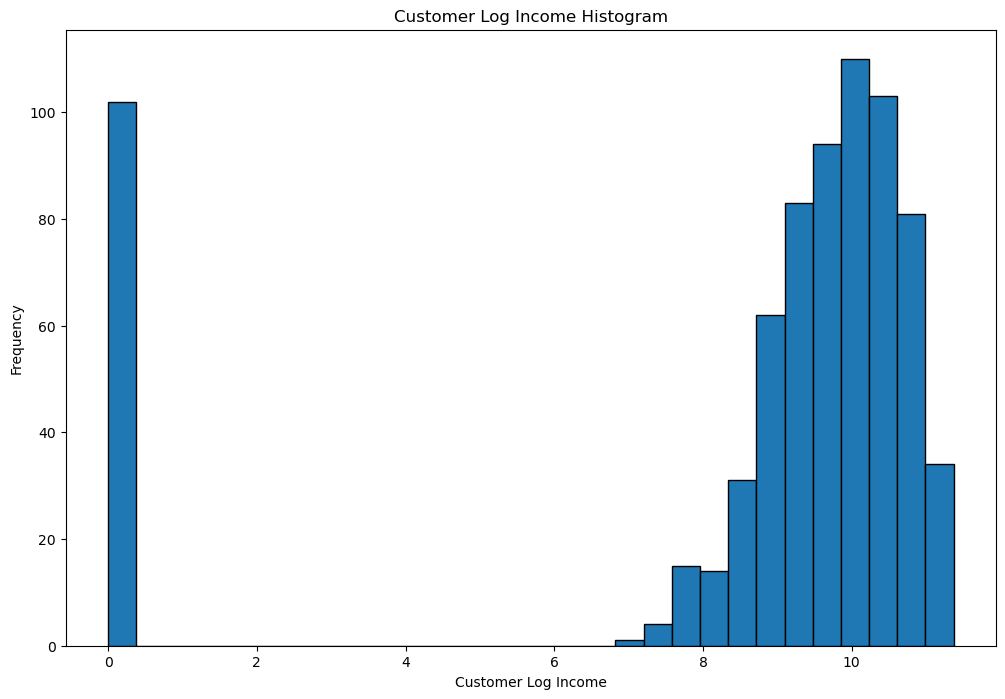

In [52]:
fig, ax = plt.subplots()
df_customer_1['log_income'].hist(bins=30, edgecolor = 'black', grid = False)
ax.set_title('Customer Log Income Histogram')
ax.set_xlabel('Customer Log Income')
ax.set_ylabel('Frequency')

Feature Engineering

Gender --> Binary

In [53]:
dummies_gender = pd.get_dummies(df_customer_1['gender'], prefix='dummy').iloc[:, 1:]
df_customer_1= pd.concat([df_customer_1, dummies_gender], axis=1)
df_customer_1

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,age_category,age_bin,log_income,dummy_M
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,middle age,2,10.171643,1
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,senior,3,8.795734,1
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,middle age,2,9.828171,0
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,senior,3,10.772037,0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,senior,3,10.704480,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,middle age,2,9.602112,0
730,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,senior,3,10.180665,1
731,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,middle age,2,11.023551,1
732,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,middle age,2,9.622516,0


        CLUSTERING

In [54]:
df_demogr=df_customer_1.loc[:, df_customer_1.columns.drop(['cust_id', 'name_prefix','first_name','last_name', 'street_nbr', 'street_name', 'postal_code','city_name', 'state_code','income','age_category','age','gender'])]
df_demogr


,years_with_bank,nbr_children,marital_status,age_bin,log_income,dummy_M
0,5,1,2,2,10.171643,1
1,1,0,2,3,8.795734,1
2,8,0,1,2,9.828171,0
3,3,0,1,3,10.772037,0
4,9,2,4,3,10.704480,0
...,...,...,...,...,...,...
729,6,1,4,2,9.602112,0
730,6,1,2,3,10.180665,1
731,0,2,2,2,11.023551,1
732,7,0,2,2,9.622516,0


In [55]:
#Step 1: Checking the correlation of df_demogr (Note: there is no value higher than 0.8)
df_corr = df_demogr.corr(method ='pearson').abs()


#Step 2: Identifies indices where correlation is > 0.8
indices = np.where(df_corr > 0.8) 
indices = [(df_corr.index[x], df_corr.columns[y]) 
for x, y in zip(*indices)
    if x != y and x < y]

# step 3: drops indices where value of correlation is > 0.8
for idx in indices: #each pair
    try:
        df_transformed.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass


#Step 4: check the correlated columns by printing the indices (Note: as the correlation was not > 0.8 and there were no indices removes this output is empty)
print(indices)

[]


    PCA Process

For PCA it is important that the data be scaled. 

Choosing the right number of dimensions (k). 

The original number of dimensions in our dataset is 6. We have not reduced the dimensionality, and therefore, the percentage of variance explained by 30 principal components should be 100%.
K = 6, Variance is 100%
K = 3 , variance is 71.3%
K = 4, variance is 85.81%

A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 3 components.

In [56]:
#Scaling data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df_demogr = scaler.fit_transform(df_demogr)

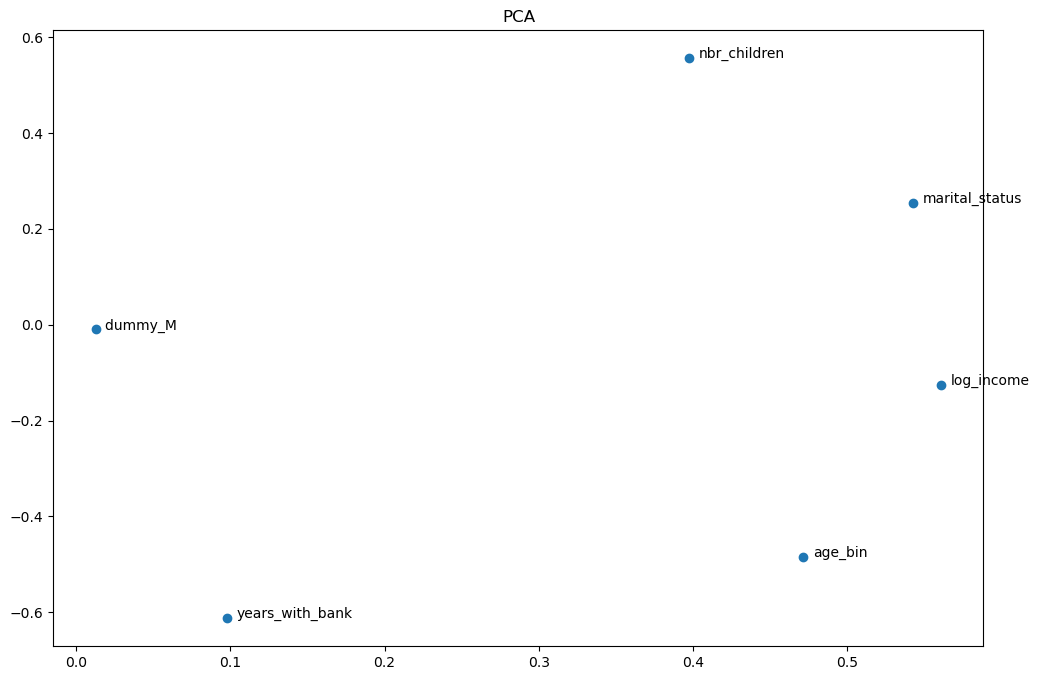

In [57]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#creating a pca object with n componenets
pca = PCA(n_components=4)

#fitting and transforming data using PCA
X_pca = pca.fit_transform(scaled_df_demogr)
components = pca.components_

fig, ax = plt.subplots(1,1)
ax.set_title("PCA")
ax.scatter(components[0], components[1])

for i, txt in enumerate(df_demogr.columns.to_list()):
    ax.annotate(txt, (components[0][i], components[1][i]), xytext=(7,0), textcoords='offset points')

In [58]:
print(sum(pca.explained_variance_ratio_ *100))

85.81510128916672


In [59]:
pca.explained_variance_ratio_ *100

array([34.60828045, 20.06450111, 16.68672735, 14.45559238])

Text(0.5, 1.0, 'Explained Variance of PCA features')

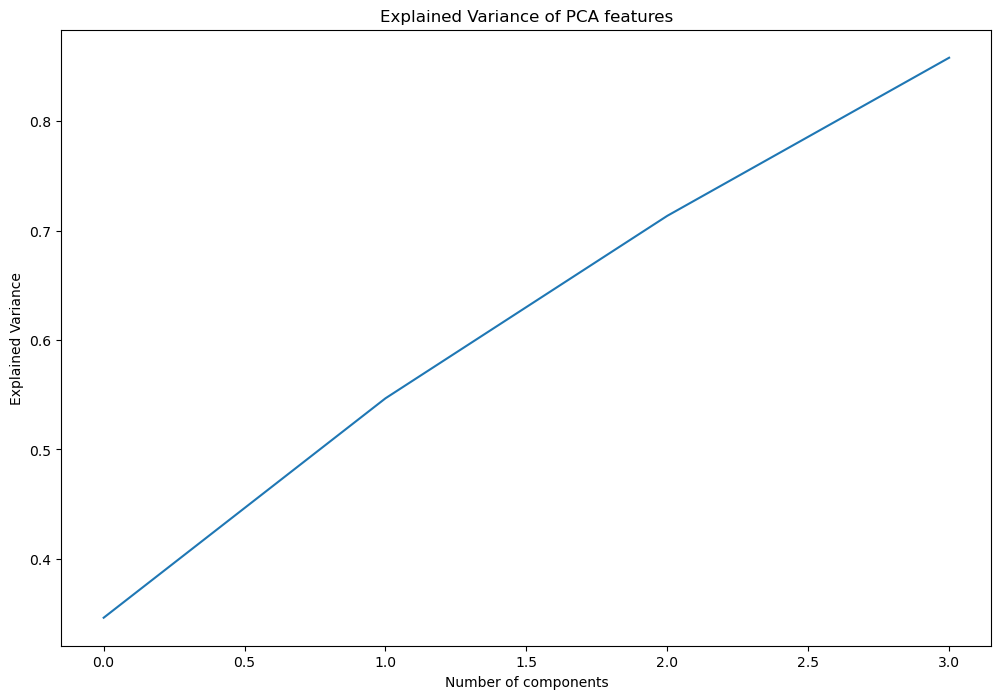

In [60]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of PCA features')

    K-means clustering

In [61]:
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(scaled_df_demogr)

k_labels = km.labels_


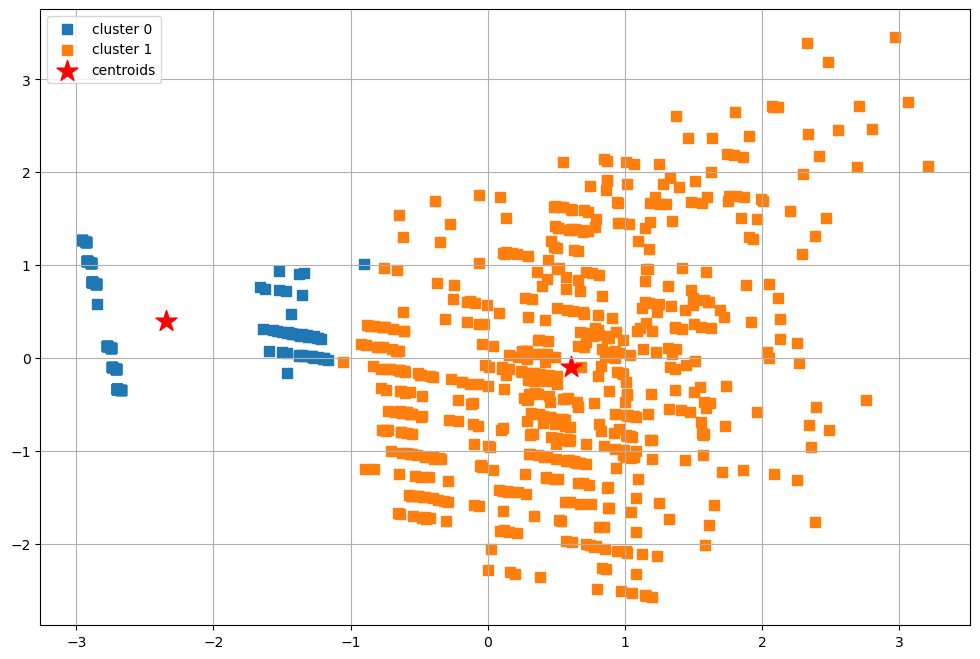

In [62]:
#Ploting how k-means algorithm assigned the clusters to our data
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

 # plot clustering result
plot_clusters(X_pca, y_km, plt_cluster_centers= True)

c:\Users\zarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


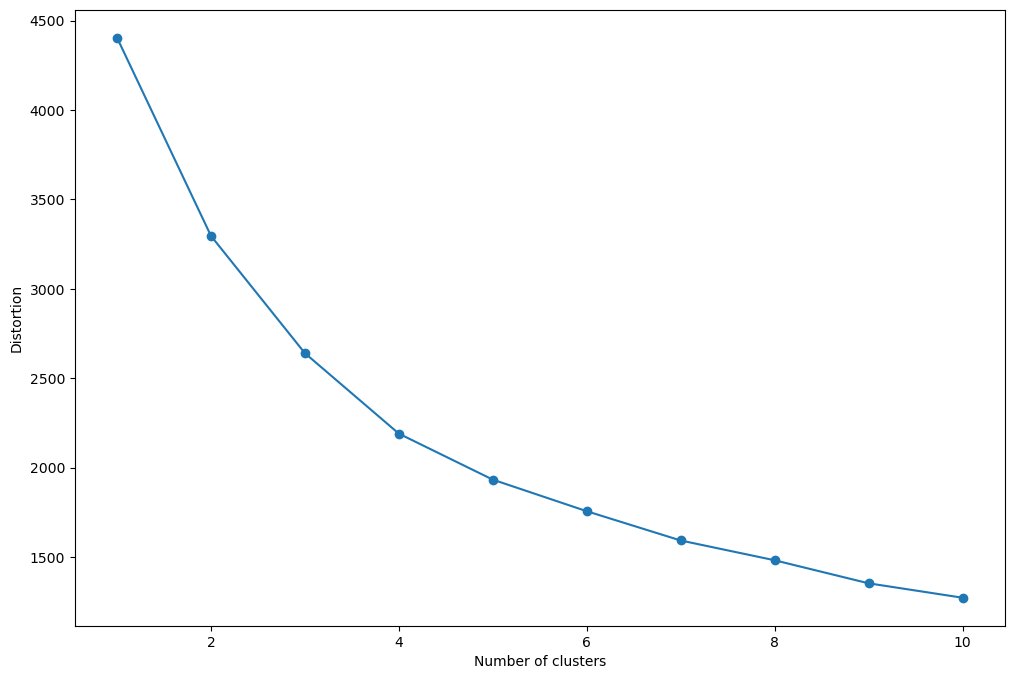

In [63]:
#Elbow Rule
def plot_distortion(scaled_df_demogr,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(scaled_df_demogr)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

# elbow rule
plot_distortion(scaled_df_demogr, 10)

        Radar Chart for Clusters

In [64]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,5))
minmax_df = minmax.fit_transform(df_demogr)
new_df = pd.DataFrame(minmax_df, columns=df_demogr.columns.to_list())

In [65]:
new_cols = pd.DataFrame(y_km)

In [66]:
final_df = pd.concat([new_df, new_cols], axis=1)
final_df.rename(columns={0:'cluster'}, inplace=True)

In [67]:
clusters = []
cluster_list = final_df['cluster'].unique().tolist()
cluster_list.sort()

for i in cluster_list:
    clusters.append(final_df[
                        final_df['cluster'] == i
                    ])

In [68]:
import plotly.graph_objects as go

categories = final_df.columns.to_list()
categories.remove('cluster')

fig = go.Figure()

for cluster in clusters:
    #R computation
    r = []
    for i in categories:
        r.append(cluster[i].mean())
        
    fig.add_trace(go.Scatterpolar(
        r=r,
        theta=categories,
        fill='toself', name=f'Cluster {cluster.iloc[0,-1]}'))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.write_html("radar.html")

fig.show()